<a href="https://colab.research.google.com/github/jx-dohwan/Initial_public_offering_price_prediction/blob/main/model_%EC%8B%A4%ED%97%982.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature select
### 1. 기본변수
### 2. 상관계수로 입증한 유의미한 가설 변수 추가
### 3. 로지스틱회귀분석으로 입증한 유의미한 가설 변수 추가
### 4. 결정트리(CART)으로 입증한 유의미한 가설 변수 추가
### 5. 결정트리(C5.0)으로 입증한 유의미한 가설 변수 추가 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from scipy.stats import pointbiserialr

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

## 1. 기본 변수

In [4]:
df = pd.read_csv('/content/drive/MyDrive/인공지능/경영빅데이터/data/IPOv3_resampled_data.csv')

In [5]:
df = df.drop(['최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)', '최근 3개월 공모주 수', 
              '희망공모가_하한', '희망공모가_상한', '전문투자자(비율)' , 'ROE'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   상장 시기(상장월)         832 non-null    int64  
 1   최근 "따" 비율          832 non-null    float64
 2   공모가                832 non-null    int64  
 3   밴드수익률(공모가/공모가_상한)  832 non-null    float64
 4   기관경쟁률              832 non-null    float64
 5   청약경쟁률              832 non-null    float64
 6   의무보유확약             832 non-null    float64
 7   대표주간사              832 non-null    int64  
 8   IPO 주간사 순위         832 non-null    int64  
 9   총 공모주식 수           832 non-null    int64  
 10  구주매출(비율)           832 non-null    float64
 11  매출액(백만원)           832 non-null    int64  
 12  순이익(백만원)           832 non-null    int64  
 13  자본금(백만원)           832 non-null    int64  
 14  우리사주조합(비율)         832 non-null    float64
 15  일반청약자(비율)          832 non-null    float64
 16  공모후 상장주식수(주식수)     832 non

In [7]:
X = df.drop('종속변수', axis=1)
y = df['종속변수']

###  1) 모델링

#### 로지스틱 회귀분석

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=verbose, n_jobs=n_jobs)
    
    grid_model.fit(train, y)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score

    results = results.sort_values('score', ascending=False)

    return results



# 로지스틱 회귀 모델 정의
logreg = LogisticRegression()

# 하이퍼파라미터 그리드
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'max_iter': [100, 200, 300, 400, 500]}

# 데이터 준비 (X_train과 y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 그리드서치 실행
my_GridSearch(logreg, X_train, y_train, param_grid)



Fitting 5 folds for each of 35 candidates, totalling 175 fits


,C,max_iter,score
1,0.001,200,0.796992
17,1.000,300,0.795489
14,0.100,500,0.795489
28,100.000,400,0.795489
24,10.000,500,0.795489
23,10.000,400,0.795489
22,10.000,300,0.795489
21,10.000,200,0.795489
29,100.000,500,0.795489
19,1.000,500,0.795489


In [9]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(C=0.001, max_iter=200)
logreg.fit(X_train, y_train)

print("Logistic Regression Score: ", logreg.score(X_test, y_test))

logreg_pred = logreg.predict(X_test)
print("Logistic Regression: ")
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

Logistic Regression Score:  0.7544910179640718
Logistic Regression: 
[[45 32]
 [ 9 81]]
              precision    recall  f1-score   support

           0       0.83      0.58      0.69        77
           1       0.72      0.90      0.80        90

    accuracy                           0.75       167
   macro avg       0.78      0.74      0.74       167
weighted avg       0.77      0.75      0.75       167



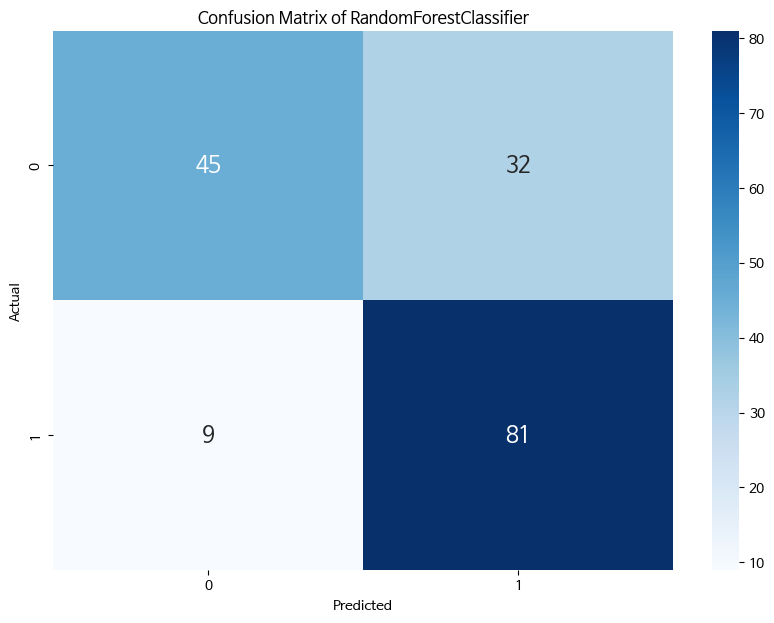

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 'model'과 'X_test'는 당신의 모델과 테스트 데이터입니다.
cm = confusion_matrix(y_test, logreg_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of RandomForestClassifier')
plt.show()

### 결정트리 그리드서치

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=verbose, n_jobs=n_jobs)
    
    grid_model.fit(train, y)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score

    results = results.sort_values('score', ascending=False)

    return results

# Decision Tree 모델 정의
dt = DecisionTreeClassifier()

# 하이퍼파라미터 그리드
param_grid = {'max_depth': list(range(1, 10)),
              'min_samples_split': list(range(5, 10)),
              'min_samples_leaf': list(range(5, 10)),
              'max_leaf_nodes': list(range(10, 18)),  # 추가
              'max_features': ['auto', 'log2'],  # 추가
              'criterion' : ['gini', 'entropy']
             }

# 데이터 준비 (X_train과 y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 그리드서치 실행
my_GridSearch(dt, X_train, y_train, param_grid)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


,criterion,max_depth,max_features,max_leaf_nodes,min_samples_leaf,min_samples_split,score
6552,entropy,8,auto,16,5,7,0.848120
2427,gini,7,auto,11,5,7,0.839098
2659,gini,7,log2,12,6,9,0.833083
3566,gini,9,log2,16,8,6,0.831579
5766,entropy,6,auto,16,8,6,0.831579
...,...,...,...,...,...,...,...
3807,entropy,1,log2,10,6,7,0.601504
23,gini,1,auto,10,9,8,0.600000
3680,entropy,1,auto,13,6,5,0.593985
127,gini,1,auto,15,5,7,0.575940


#### 결정트리(CART)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Accuracy:  0.8023952095808383
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.81      0.79        77
           1       0.83      0.80      0.81        90

    accuracy                           0.80       167
   macro avg       0.80      0.80      0.80       167
weighted avg       0.80      0.80      0.80       167



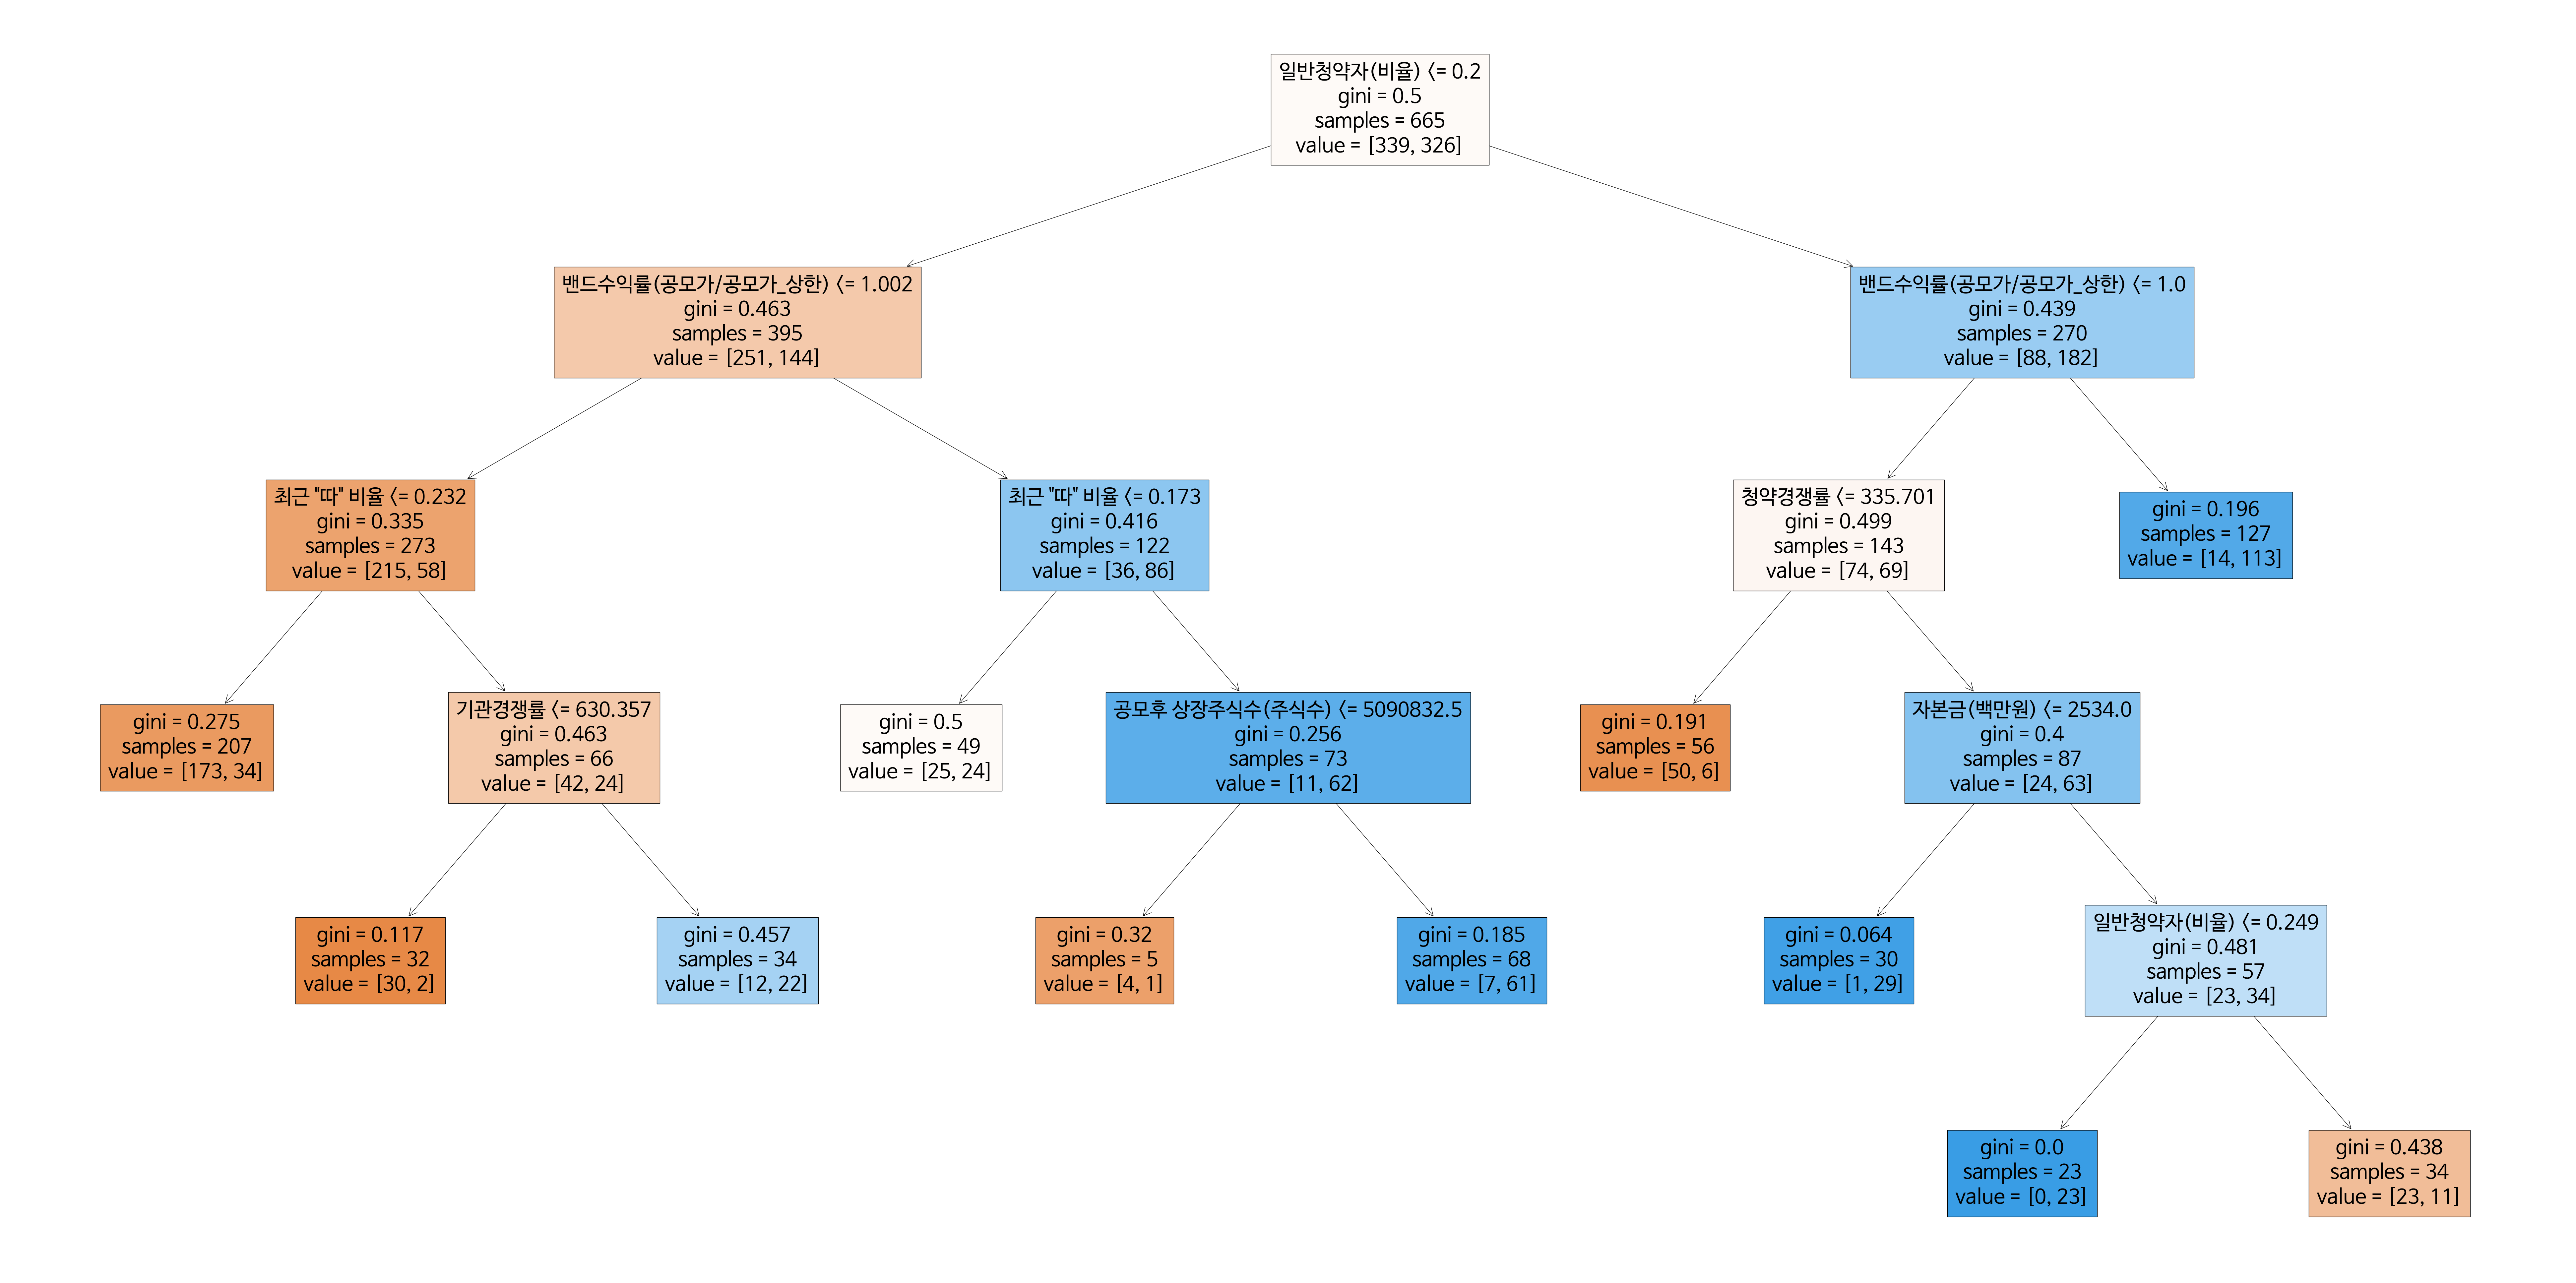

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Split data into training and test sets


# Define the classifier
dtc = DecisionTreeClassifier(criterion="gini", max_depth=7, max_features='auto', max_leaf_nodes=11, min_samples_leaf=5, min_samples_split=7)

# Fit the classifier to the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

# Measure the performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(100,50))
plot_tree(dtc, filled=True, feature_names=X.columns)
plt.show()


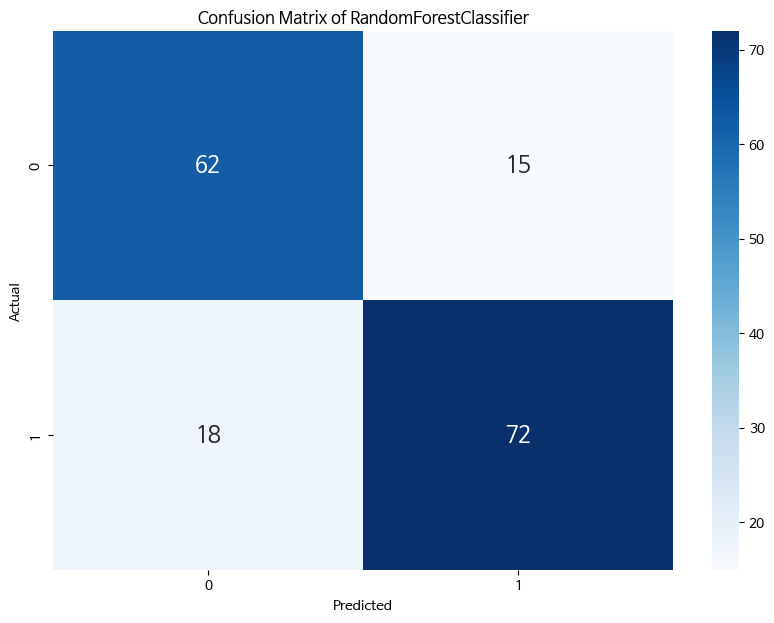

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of RandomForestClassifier')
plt.show()

#### 결정트리(C5.0)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Accuracy:  0.7485029940119761
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.61      0.69        77
           1       0.72      0.87      0.79        90

    accuracy                           0.75       167
   macro avg       0.76      0.74      0.74       167
weighted avg       0.76      0.75      0.74       167



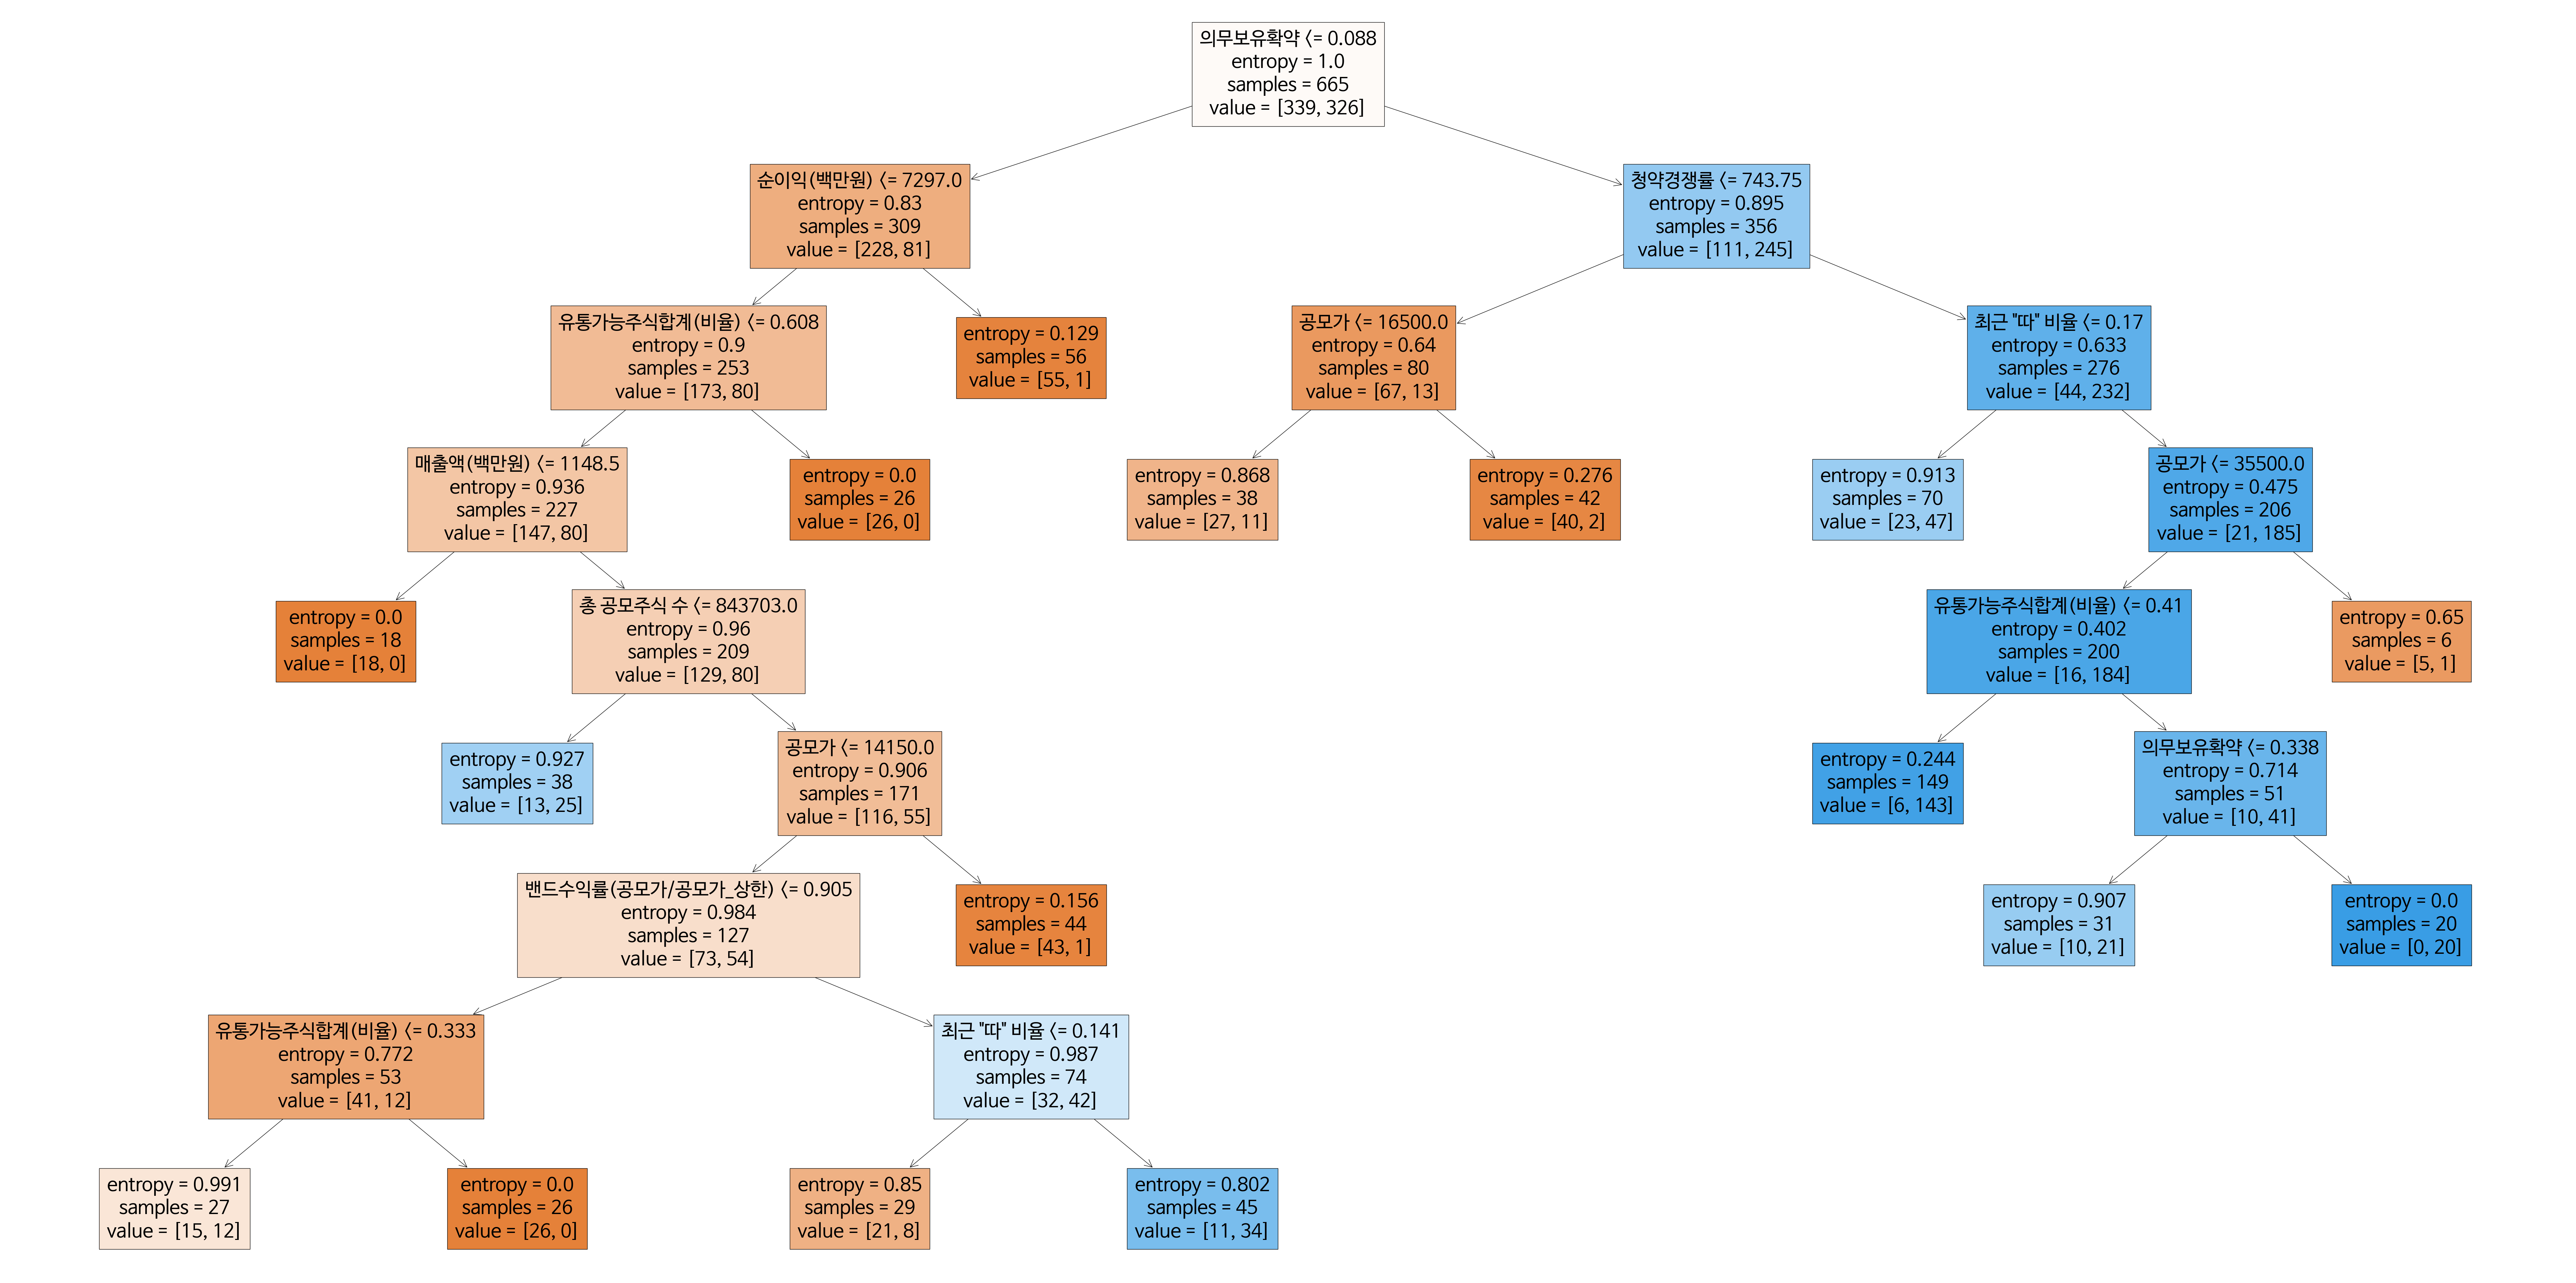

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifier
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=8, max_features='auto', max_leaf_nodes=16, min_samples_leaf=5, min_samples_split=7)

# Fit the classifier to the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

# Measure the performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(100,50))
plot_tree(dtc, filled=True, feature_names=X.columns)
plt.show()


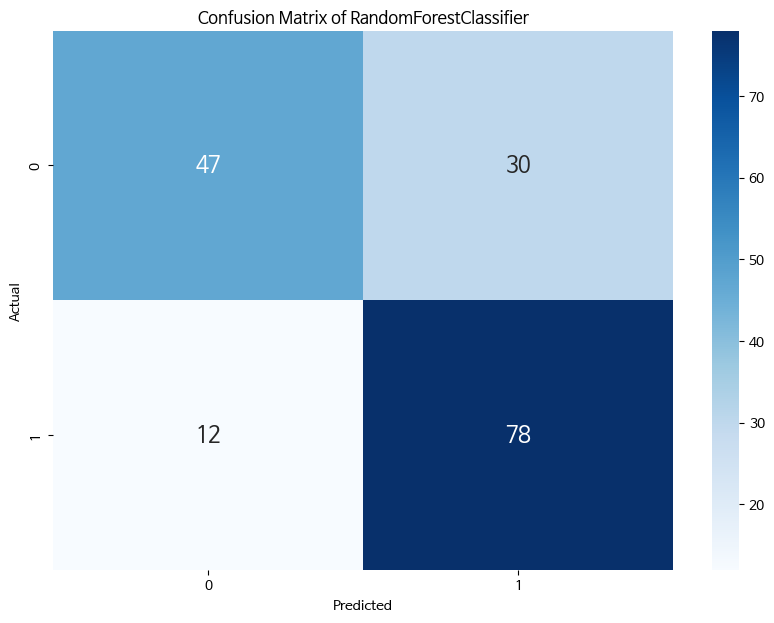

In [16]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of RandomForestClassifier')
plt.show()

#### 신경망 3계층

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=verbose, n_jobs=n_jobs)
    
    grid_model.fit(train, y)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score

    results = results.sort_values('score', ascending=False)

    return results

# MLPClassifier 모델 정의
mlp = MLPClassifier()

# 하이퍼파라미터 그리드
param_grid = {
    'hidden_layer_sizes': [(1,), (3, ), (5,), (7, ), (9,), (11,),(13,),(15,)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300, 400, 500]
}

# 데이터 준비 (X_train과 y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 그리드서치 실행
my_GridSearch(mlp, X_train, y_train, param_grid)



Fitting 5 folds for each of 120 candidates, totalling 600 fits


,hidden_layer_sizes,learning_rate_init,max_iter,score
112,"(15,)",0.010,300,0.545865
109,"(15,)",0.001,500,0.541353
84,"(11,)",0.010,500,0.538346
98,"(13,)",0.010,400,0.536842
106,"(15,)",0.001,200,0.533835
...,...,...,...,...
63,"(9,)",0.001,400,0.478195
36,"(5,)",0.010,200,0.475188
92,"(13,)",0.001,300,0.469173
93,"(13,)",0.001,400,0.464662


In [19]:
mlp = MLPClassifier(max_iter=300, learning_rate_init=0.01, hidden_layer_sizes=(15,))

mlp.fit(X_train, y_train)


print("Logistic Regression Score: ", mlp.score(X_test, y_test))

pred = mlp.predict(X_test)
print("Logistic Regression: ")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Logistic Regression Score:  0.5149700598802395
Logistic Regression: 
[[ 9 68]
 [13 77]]
              precision    recall  f1-score   support

           0       0.41      0.12      0.18        77
           1       0.53      0.86      0.66        90

    accuracy                           0.51       167
   macro avg       0.47      0.49      0.42       167
weighted avg       0.47      0.51      0.44       167



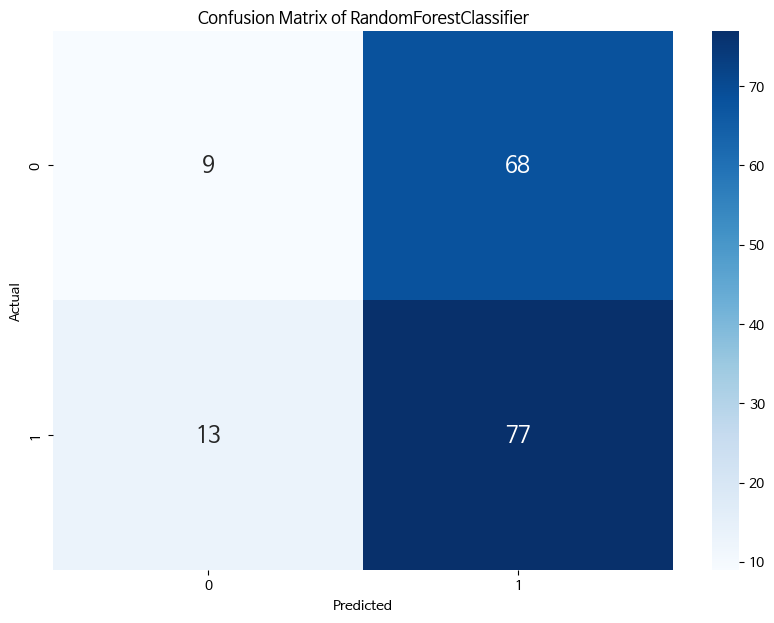

In [20]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of RandomForestClassifier')
plt.show()

#### 신경망 4계층

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=verbose, n_jobs=n_jobs)
    
    grid_model.fit(train, y)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score

    results = results.sort_values('score', ascending=False)

    return results

# MLPClassifier 모델 정의
mlp = MLPClassifier()

# 하이퍼파라미터 그리드
param_grid = {
    'hidden_layer_sizes': [(1,1), (3,3 ), (5,5), (7,7 ), (9,9), (11,11),(13,13),(15,15)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300, 400, 500]
}

# 데이터 준비 (X_train과 y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 그리드서치 실행
my_GridSearch(mlp, X_train, y_train, param_grid)



Fitting 5 folds for each of 120 candidates, totalling 600 fits


,hidden_layer_sizes,learning_rate_init,max_iter,score
84,"(11, 11)",0.010,500,0.547368
51,"(7, 7)",0.010,200,0.544361
97,"(13, 13)",0.010,300,0.539850
92,"(13, 13)",0.001,300,0.532331
75,"(11, 11)",0.001,100,0.529323
...,...,...,...,...
23,"(3, 3)",0.010,400,0.481203
66,"(9, 9)",0.010,200,0.481203
36,"(5, 5)",0.010,200,0.473684
107,"(15, 15)",0.001,300,0.455639


In [25]:
mlp = MLPClassifier(max_iter=500, learning_rate_init=0.01, hidden_layer_sizes=(11,11))

mlp.fit(X_train, y_train)


print("Logistic Regression Score: ", mlp.score(X_test, y_test))

pred = mlp.predict(X_test)
print("Logistic Regression: ")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Logistic Regression Score:  0.5389221556886228
Logistic Regression: 
[[ 0 77]
 [ 0 90]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.54      1.00      0.70        90

    accuracy                           0.54       167
   macro avg       0.27      0.50      0.35       167
weighted avg       0.29      0.54      0.38       167



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


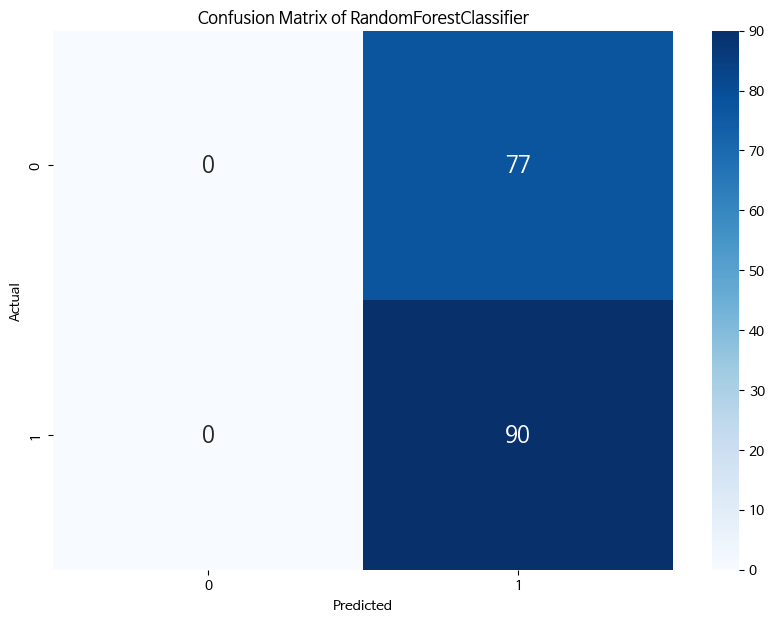

In [26]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of RandomForestClassifier')
plt.show()

In [ ]:
``